<a href="https://colab.research.google.com/github/Alvarosotom/Redes_Neuronales/blob/main/PyTorch_1_profe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection


# PyTorch Basics

En PyTorch la unidad basica con la que se trabaja son los tensores. Como se recordara un tensor es una representación más abstracta de los objetos matemáticos que usamos constantemente (i.e. escalares, vectors, matrices). Acontinuación vamos a definir algunos tensores simples.

In [ ]:
# dtype: float (float32), float16, float64 (double) ...
a = torch.tensor(1,dtype=torch.float)      #constante
b = torch.tensor([2,3],dtype=torch.float)  #vector
C = torch.tensor([[4,5],[6,7]]).float()    #matriz
print(a)
print(b)
print(C)

tensor(1.)
tensor([2., 3.])
tensor([[4., 5.],
        [6., 7.]])


Ahora veamos como realizar algunas operacione entre tensores en PyTorch

In [ ]:
print(a * b)
print(a * C)
print(C @ b) # Matrix multiplication, in general sum_k A_ij....k B_kpq....r
print(C * C) # Element wise multiplication
print(C @ C) # Matrix multiplication

tensor([2., 3.])
tensor([[4., 5.],
        [6., 7.]])
tensor([23., 33.])
tensor([[16., 25.],
        [36., 49.]])
tensor([[46., 55.],
        [66., 79.]])


El corazón de PyTorch es el de poder realizar auto diferenciación (Autograd o Autodiff). Veamos una operación simple y como calcular la derivadas parciales con respecto a cada variable

In [ ]:
a = torch.tensor(2,dtype=torch.float,requires_grad=True)
b = torch.tensor(3).float().requires_grad_(True)
c = torch.tensor(4).float().requires_grad_(True)
d = a + b * c
d.backward()
print(a.grad,b.grad,c.grad)

tensor(1.) tensor(4.) tensor(3.)


Veamos ahora un ejemplo un poco mas complicado para poder apreciar el alcance y todo lo que se puede lograr con el Autograd.

In [ ]:
A = torch.tensor([[1,2],[3,4]]).float().requires_grad_(True)
det_A = torch.det(A)
det_A.backward()
print(A)
print(det_A)
print(A.grad)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor(-2., grad_fn=<LinalgDetBackward0>)
tensor([[ 4., -3.],
        [-2.,  1.]])


$x_1,x_2,x_3,x_4$ $det(A)=x_1x_4-x_2x_3$

In [ ]:
inv_A = torch.linalg.inv(A)
# Calculemos la derivada del determinante de un matriz con respecto
# a los elementos de la matriz original
print(inv_A)
print(inv_A.T)
print(inv_A.T * det_A)

tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]], grad_fn=<LinalgInvExBackward0>)
tensor([[-2.0000,  1.5000],
        [ 1.0000, -0.5000]], grad_fn=<PermuteBackward0>)
tensor([[ 4., -3.],
        [-2.,  1.]], grad_fn=<MulBackward0>)


# Simple Linear Regression

Veamos un caso simple en como aplicar los que hemos aprendido de PyTorch a un problema comun: regresion lineal. Primero creemos algunos datos randoms.

In [ ]:
N = 100
x_data = torch.linspace(0,5,N).float()          #tensor que representa las caracteristicas de entrada
y_data = 2 * x_data + 5 + 2*torch.randn(N)      #tensor que representa los valores objetivos

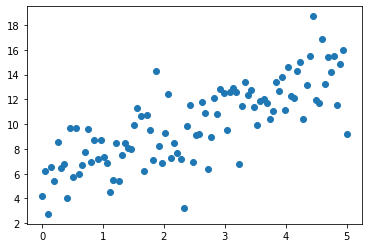

In [ ]:
plt.scatter(x_data,y_data)

Problema: Queremos encontrar la recta que mejor se ajuste a los datos que generamos.

Sabemos que nuestra recta tiene 2 parametros: w (pendiente) y b (intercepto). Asi que el problema se centra en encontrar los ***parametros*** optimos que ajustan al ***modelo*** a los datos que tenemos. Para medir que "tan bien" se ajusta nuestro modelo a nuestros datos, vamos a necesitar de algun tipo de medida. A esta medida se le conoce como ***función de perdida*** (Loss Function). La función de pérdida más común en regresión es la de "mean square error loss", la cual se define acontinuacion.

$\mathcal{L}(ypred,y) = \frac{1}{n}\sum_{i=0}^n \vert ypred_i - y_i \vert ^ 2$

Como se puede ver en esta ecuación, cuanto más se parezca $ypred$ al valor de $y$, la función de perdida se vuelve más pequeña. Entonces el problema se reduce a un problema de minimización.

Utilizemos el método del gradient descent para poder encontrar los parámetros de la recta que se adecua mejor a nuestros datos.

In [ ]:
# Definimos los parametros de nuestro modelo
w = torch.tensor(1).float().requires_grad_(True)  #Definimos w como la "pendiente", se inicializa con valor de 1
b = torch.tensor(1).float().requires_grad_(True)  #Definimos b como la "ordenada del origen", se inicializa con valor de 1
                                                  #requires_grad en True: PyTorch gradientes con respecto a estos parámetros
# Learning rate(tasa de aprendisaje)
lr = 0.1

for epoch in range(100):            #Bucle de entrenamiento de 100 epocas
  # Hacemos una prediccion con los valores de los parametros actuales 'w' y 'b'
  y_pred = w * x_data + b
  # Calculamos la perdida (loss function) entre las predicciones (y_pred) y los valores reales (y_data).
  loss = torch.mean((y_pred - y_data)**2)
  # Realizamos el backpropagation para la calcular la gradiente
  # del loss function con respecto a cada variable (w y b).
  loss.backward()    #llamada de pytorch para calcular la gradiente través de la retropropagación automática (autograd)
  if epoch % 10 == 0:        #verifica si el número de época es divisible por 10 sin dejar un residuo.
      #Es común imprimir información(de depuración o de seguimiento), como la pérdida, solo cada cierto número de
      #épocas (en este caso, cada 10 épocas) en lugar de imprimir información en cada época.
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Actualizamos los parametros siguiendo la direccion
  # contraria del gradiente
  w.data = w.data - lr * w.grad   #Formula de actualización de los pesos
  b.data = b.data - lr * b.grad   #actualiza el valor del parámetro b (ordenada al origen)
  w.grad.zero_()
  b.grad.zero_()
print(w,b)

epoch: 0, loss: 47.761104583740234
epoch: 10, loss: 6.626482963562012
epoch: 20, loss: 4.740452766418457
epoch: 30, loss: 4.338134765625
epoch: 40, loss: 4.190454483032227
epoch: 50, loss: 4.133640766143799
epoch: 60, loss: 4.111720085144043
epoch: 70, loss: 4.1032609939575195
epoch: 80, loss: 4.099996566772461
epoch: 90, loss: 4.0987372398376465
tensor(1.7543, requires_grad=True) tensor(5.6245, requires_grad=True)


Realicemos lo mismo pero utilizando algunas de las herramientas que nos da PyTorch

In [ ]:
# Definimos los parametros: w y b
linear_model = nn.Linear(1,1)             #Definimos un modelo de regresion lineal, (1,1) de una entrada y una salida
# Veamos los parámetros de nuestro modelo
for param in linear_model.parameters():
  print(param)

# Definimos nuestra funcion de perdida
crit = nn.MSELoss()

# Definimos nuestro optimizador
# en otras palabras, la forma en la que actualizaremos nuestros parámetros
# w.data = w.data - lr * w.grad
# b.data = b.data - lr * b.grad
optim = torch.optim.SGD(linear_model.parameters(),lr=0.1)  #obtimizador que se usara descenso de gradiente estocástico (SGD)
                                                            #Se establece la tasa de aprendisaje en "0.1"
                                                            # Se pasa linear_model.parameters() para especificar que el optimizador debe actualizar los parámetros del modelo

# Preparamos nuestros datos
x = x_data.reshape(-1,1)
y = y_data.reshape(-1,1)

for epoch in range(100):
  # Volvemos todas las gradientes zero para evitar acumulación de gradientes
  optim.zero_grad()
  # Hacemos una predicción con los valores actuales de los parámetros
  y_pred = linear_model(x)
  # Calculamos la perdida
  loss = crit(y_pred, y)
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Realizamos el backpropagation
  loss.backward()
  # Actualizamos los parametros
  optim.step()


Parameter containing:
tensor([[0.3437]], requires_grad=True)
Parameter containing:
tensor([-0.8482], requires_grad=True)
epoch: 0, loss: 108.40632629394531
epoch: 10, loss: 9.370863914489746
epoch: 20, loss: 5.3187761306762695
epoch: 30, loss: 4.550124645233154
epoch: 40, loss: 4.272001266479492
epoch: 50, loss: 4.165103912353516
epoch: 60, loss: 4.123861312866211
epoch: 70, loss: 4.107946395874023
epoch: 80, loss: 4.101805210113525
epoch: 90, loss: 4.0994343757629395


# Multi Layer Perceptron

Ahora veamos un modelo un poco más complicado que un simple modelo lineal. Un MultiLayer Perceptron básicamente consiste en un sequencia de multiplicaciones matriciales

In [ ]:
mnist_train_ds = torchvision.datasets.MNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
mnist_test_ds = torchvision.datasets.MNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 87141090.16it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23567255.61it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 19697109.17it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17178114.31it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Veamos la forma de la data en MNIST

In [ ]:
print("Total cantidad de datos en MNIST: ",len(mnist_train_ds))
x, y = next(iter(mnist_train_ds))
print(y)
print(x.shape)

Total cantidad de datos en MNIST:  60000
5
torch.Size([1, 28, 28])


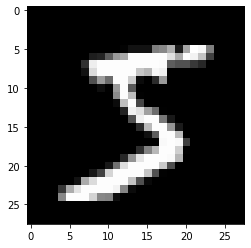

In [ ]:
plt.imshow(x.reshape(28,28).numpy(),cmap="gray")

Cuando entrenamos redes neuronales, es prácticamente imposible utilizar todos los datos ya que no tenemos suficiente memoria (RAM memory). Por lo que se acostumbra entrenar utilizando "lotes" o "batches" más pequeños, lo cual tambien trae beneficios en la precision alcanzada por la red.

In [ ]:
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_ds,batch_size=128)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_ds,batch_size=128)

In [ ]:
for x, y in mnist_train_loader:
  print(x.shape, y.shape)
  break

torch.Size([128, 1, 28, 28]) torch.Size([128])


Otro de los beneficios que nos provee PyTorch es el de poder usar el poder computacional de las tarjetas gráficas (GPU).

In [ ]:
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
x = torch.rand(3,3)
print(x)

tensor([[0.3375, 0.7773, 0.1842],
        [0.0577, 0.1213, 0.1682],
        [0.5824, 0.1145, 0.5992]])


In [ ]:
# y = torch.rand(3,3,device=dev)
y = torch.rand(3,3).to(dev)
print(y)

tensor([[0.0478, 0.2014, 0.0771],
        [0.2847, 0.6757, 0.7370],
        [0.9861, 0.4021, 0.5567]], device='cuda:0')


Ahora definamos nuestro modelo.

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

Definamos nuestro loss function y el optimizador que será usado en el entrenamiento

In [ ]:
crit = nn.CrossEntropyLoss()  #funcion de error (como el error cuadratico medio)
optim = torch.optim.Adam(model.parameters(),lr=0.01)   #optimizaor taza de aprendisaje de 0.001 (ejeplo: gradiente estocastico)

Pongamos el algoritmo de entrenamiento anteriormente usado dentro de una función.

In [ ]:
def evaluate(model, loader, crit):   #funcion en python es def.
  model.eval()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in loader:
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()  #cuantas predicciones
    total += len(y)                                             #contador
  acc = 100* corrects / total
  avg_loss /= len(loader)
  return avg_loss, acc

def train_one_epoch(model, train_loader, crit, optim):   #para un rango de epocas
  model.train()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in train_loader:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    loss.backward()
    optim.step()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100 * corrects / total
  avg_loss /= len(train_loader)
  return avg_loss, acc

def train(model, train_loader, test_loader, crit, optim, epochs = 5):
  for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader,crit, optim)
    test_loss, test_acc = evaluate(model, test_loader, crit)
    print(f"epoch: {epoch}, train loss: {train_loss}, train acc: {train_acc}%, test loss: {test_loss}, test acc: {test_acc}%")

Entrenemos nuestro modelo!

In [ ]:
EPOCHS = 5
train(model,mnist_train_loader,mnist_test_loader,crit,optim,epochs=EPOCHS)

epoch: 0, train loss: 0.2675590215745801, train acc: 92.06%, test loss: 0.19692874268946958, test acc: 94.75%
epoch: 1, train loss: 0.14624805872523183, train acc: 95.755%, test loss: 0.19643989340932685, test acc: 94.52%
epoch: 2, train loss: 0.1312651656595851, train acc: 96.375%, test loss: 0.13765761099370413, test acc: 96.3%
epoch: 3, train loss: 0.10655850170404593, train acc: 97.09666666666666%, test loss: 0.14726433510556108, test acc: 96.65%
epoch: 4, train loss: 0.09324773003770186, train acc: 97.38833333333334%, test loss: 0.1475171396681778, test acc: 96.88%


Vizualicemos algunas de las predicciones

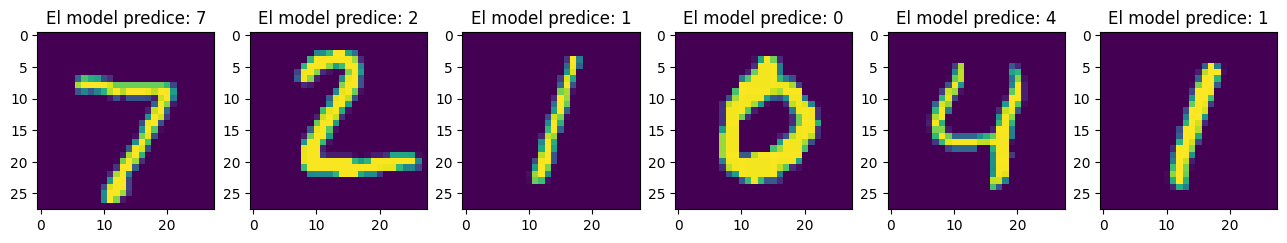

In [ ]:
N = 6
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i,(x, y) in enumerate(iter(mnist_test_ds)):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El model predice: {torch.argmax(ypred)}")

Ahora repitamos lo mismo con un dataset similar! El FashionMNIST

In [ ]:
fashion_mnist_train_ds = torchvision.datasets.FashionMNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
fashion_mnist_test_ds = torchvision.datasets.FashionMNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [ ]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

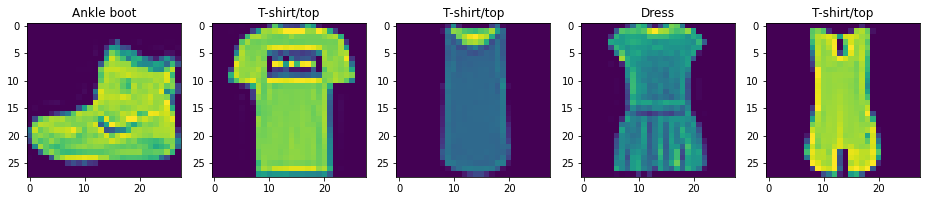

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x,y) in enumerate(fashion_mnist_train_ds):
  if i == N:
    break
  axs[i].imshow(x.reshape(28,28).numpy())
  axs[i].set_title(labels[y])

In [ ]:
fashion_mnist_train_dl = torch.utils.data.DataLoader(fashion_mnist_train_ds,batch_size=128)
fashion_mnist_test_dl = torch.utils.data.DataLoader(fashion_mnist_test_ds,batch_size=128)

In [ ]:
fashion_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

In [ ]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.SGD(fashion_model.parameters(),lr=0.01)
train(fashion_model,fashion_mnist_train_dl,fashion_mnist_test_dl,crit,optim,epochs=10)

epoch: 0, train loss: 1.4045063414807513, train acc: 61.306666666666665%, test loss: 0.9432753090617023, test acc: 67.72
epoch: 1, train loss: 0.8176697116416655, train acc: 72.17666666666666%, test loss: 0.7515628375584567, test acc: 73.48
epoch: 2, train loss: 0.6928872312309899, train acc: 76.675%, test loss: 0.6684970965113821, test acc: 77.03
epoch: 3, train loss: 0.6263319012452798, train acc: 79.27%, test loss: 0.6177784193165695, test acc: 78.97
epoch: 4, train loss: 0.5832778273869171, train acc: 80.58666666666667%, test loss: 0.5842126317416565, test acc: 80.06
epoch: 5, train loss: 0.5533864711012159, train acc: 81.51666666666667%, test loss: 0.5604930927481833, test acc: 81.04
epoch: 6, train loss: 0.5313659189606527, train acc: 82.14166666666667%, test loss: 0.5427789714517472, test acc: 81.46
epoch: 7, train loss: 0.5143599782162892, train acc: 82.64833333333333%, test loss: 0.5289633911621722, test acc: 81.73
epoch: 8, train loss: 0.5007186240351784, train acc: 82.975%, 

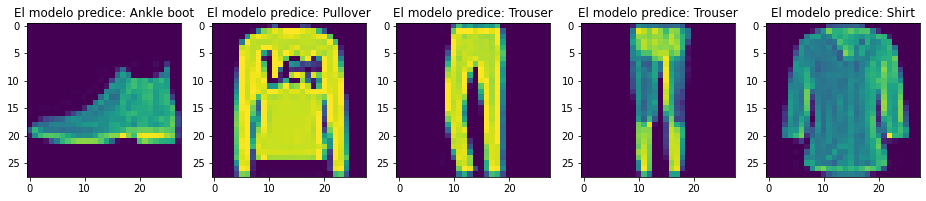

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x, y) in enumerate(fashion_mnist_test_ds):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = fashion_model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El modelo predice: {labels[torch.argmax(ypred)]}")

Ahora veremos un ejemplo de algoritmo Backpropagation en MLP. Primero preparamos la data:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


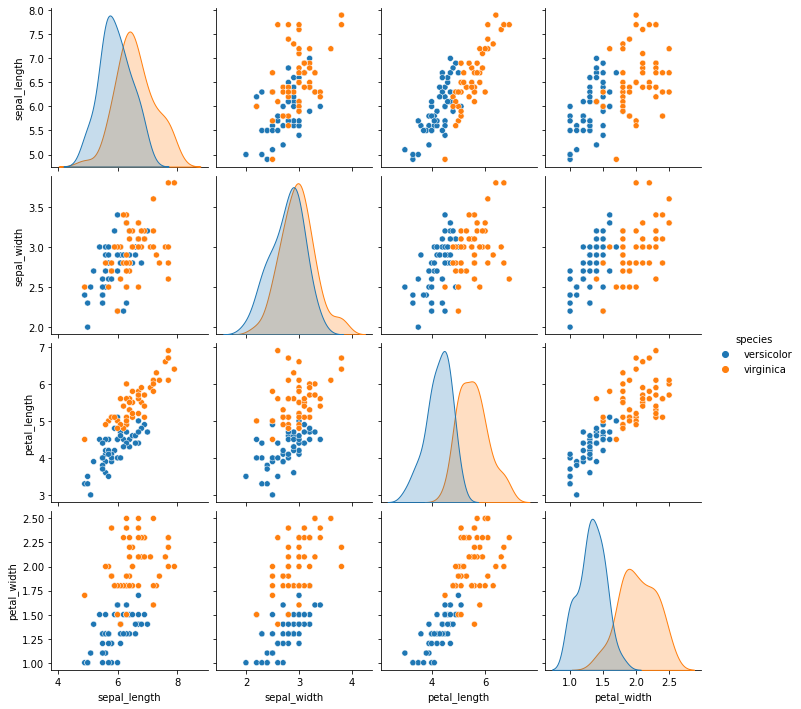

In [ ]:
iris = sns.load_dataset("iris")
#g = sns.pairplot(iris, hue="species")
df = iris[iris.species != "setosa"]
g = sns.pairplot(df, hue="species")
df['species_n'] = iris.species.map({'versicolor':1, 'virginica':2})

# Y = 'largo_petalo', 'ancho_petalo'; X = 'largo_sepalo', 'ancho_sepalo')
X_iris = np.asarray(df.loc[:, ['sepal_length', 'sepal_width']], dtype=np.float32)
Y_iris = np.asarray(df.loc[:, ['petal_length', 'petal_width']], dtype=np.float32)
label_iris = np.asarray(df.species_n, dtype=int)

# Escala
from sklearn.preprocessing import StandardScaler
scalerx, scalery = StandardScaler(), StandardScaler()
X_iris = scalerx.fit_transform(X_iris)
Y_iris = StandardScaler().fit_transform(Y_iris)

# Dividir la data
X_iris_tr, X_iris_val, Y_iris_tr, Y_iris_val, label_iris_tr, label_iris_val = \
    sklearn.model_selection.train_test_split(X_iris, Y_iris, label_iris, train_size=0.5, stratify=label_iris)

Ahora realizamos el algoritmo de Backpropagation

0 6932.80078125 3641.39697265625
10 113.70435333251953 308.97198486328125
20 57.450523376464844 216.74197387695312
30 42.3106575012207 191.138916015625
40 37.629703521728516 183.92446899414062


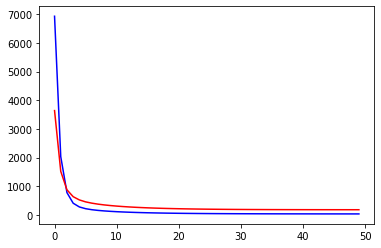

In [ ]:
# X=X_iris_tr; Y=Y_iris_tr; X_val=X_iris_val; Y_val=Y_iris_val
# del X, Y, X_val, Y_val

def two_layer_regression_autograd_train(X, Y, X_val, Y_val, lr, nite):

    dtype = torch.float
    device = torch.device("cpu")

    # N tamaño del lote; D_in dimension de la entrada;
    # H dimension de capa oculpa; D_out dimension de la salida.
    N, D_in, H, D_out = X.shape[0], X.shape[1], 100, Y.shape[1]


    X = torch.from_numpy(X)
    Y = torch.from_numpy(Y)
    X_val = torch.from_numpy(X_val)
    Y_val = torch.from_numpy(Y_val)

    # Creamos tensores aleatorios para los pesos
    # La configuración require_grad=True indica que queremos calcular gradientes
    #con respecto a estos tensores durante el backward.
    W1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
    W2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

    losses_tr, losses_val = list(), list()

    learning_rate = lr
    for t in range(nite):
        # Paso forward: calcular la predicción de y utilizando operaciones
        #sobre Tensores; son exactamente las mismas operaciones que utilizamos
        #para calcular el forward utilizando Tensores, pero no necesitamos
        #mantener referencias a valores intermedios ya que no estamos implementando
        #el backward atrás a mano.
        y_pred = X.mm(W1).clamp(min=0).mm(W2)

        # Calcula e imprime la pérdida usando operaciones sobre Tensores.
        # Ahora la pérdida es un Tensor de forma (1,)
        # loss.item() obtiene el valor escalar que contiene la pérdida.
        loss = (y_pred - Y).pow(2).sum()

        # Usar autograd para calcular el pase backward. Esta llamada calculará el
        # gradiente de la pérdida con respecto a todos los Tensores con requires_grad=True.
        # Después de esta llamada w1.grad y w2.grad serán Tensores con el gradiente
        # de la pérdida con respecto a w1 y w2 respectivamente.
        loss.backward()

       # Actualizar manualmente los pesos utilizando el descenso de gradiente. Envolver en torch.no_grad()
       # porque los pesos tienen requires_grad=True, pero no necesitamos seguir esto
       # en autograd.
       # Una forma alternativa es operar sobre weight.data y weight.grad.data.
       # Recordemos que tensor.data da un tensor que comparte el almacenamiento con
       # tensor, pero no rastrea la historia.
       # También puede utilizar torch.optim.SGD para lograr esto.
        with torch.no_grad():
            W1 -= learning_rate * W1.grad
            W2 -= learning_rate * W2.grad

            # Poner a cero manualmente los gradientes después de actualizar los pesos
            W1.grad.zero_()
            W2.grad.zero_()

            y_pred = X_val.mm(W1).clamp(min=0).mm(W2)

           # Calcula e imprime la pérdida usando operaciones sobre Tensores.
          # Ahora la pérdida es un Tensor de forma (1,)
          # loss.item() obtiene el valor escalar que contiene la pérdida.
            loss_val = (y_pred - Y).pow(2).sum()

        if t % 10 == 0:
            print(t, loss.item(), loss_val.item())

        losses_tr.append(loss.item())
        losses_val.append(loss_val.item())

    return W1, W2, losses_tr, losses_val

W1, W2, losses_tr, losses_val = two_layer_regression_autograd_train(X=X_iris_tr, Y=Y_iris_tr, X_val=X_iris_val, Y_val=Y_iris_val,
                                                                 lr=1e-4, nite=50)
plt.plot(np.arange(len(losses_tr)), losses_tr, "-b", np.arange(len(losses_val)), losses_val, "-r")